In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [57]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
LARGE_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

plot_dir = './plots/'

# Evaluating an expression carefully

Consider the following _complicated_ expression:

$$ \beta(x) = \frac{1}{x^3} \sqrt{ (4 + x^4) \sqrt{1+ x^4} - 3 x^4 - 4)} $$

Notice what happens when we try a naive evaluation of the expression

In [8]:
x = np.arange(0, 0.2, 0.0001)
b_naive = lambda x: 1 / x**3 * np.sqrt((4 + x**4) * np.sqrt( 1+ x**4) - 3 * x**4 - 4)
a_naive = lambda x: np.multiply(np.divide(np.sqrt(2),np.power(x, 3)),(1-np.sqrt(1 + np.power(x,4))))

/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


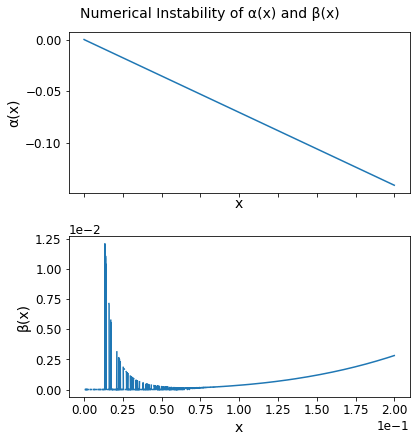

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6), sharex=True, sharey=False)
ax1.plot(x, a_naive(x))
ax1.set_xlabel('x')
ax1.set_ylabel('α(x)')
ax2.plot(x, b_naive(x))
ax2.set_xlabel('x')
ax2.set_ylabel('β(x)')
ax2.ticklabel_format(style='scientific', scilimits=(0, 1e-3))
plt.suptitle('Numerical Instability of α(x) and β(x)', y=1.02)
fig.tight_layout()
plt.show()
fig.savefig(plot_dir + 'alpha_beta_naive.png', bbox_inches='tight')

The bizarre behaviour for $ x < 0.06 $ is due to round-off error.

### Taylor series

Taylor series can help us a lot in this situation and SymPy can help us determine those coefficients. 

In [10]:
import sympy as sp
sp.init_printing()

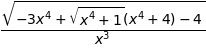

In [11]:
b_expression = sp.S('1/ x^3 * sqrt( (4 + x^4) * sqrt(1+ x^4)-3*x^4-4) ')
b_expression

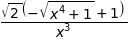

In [13]:
a_expression = sp.S('sqrt(2)/x**3*(1-sqrt(1+x**4))')
a_expression

In [14]:
b_series = sp.series(b_expression, n=20)
b_series

In [15]:
a_series = sp.series(a_expression, n=20)
a_series

In [16]:
b_taylor = sp.lambdify('x', b_series.removeO())

In [17]:
a_taylor = sp.lambdify('x', a_series.removeO())

/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


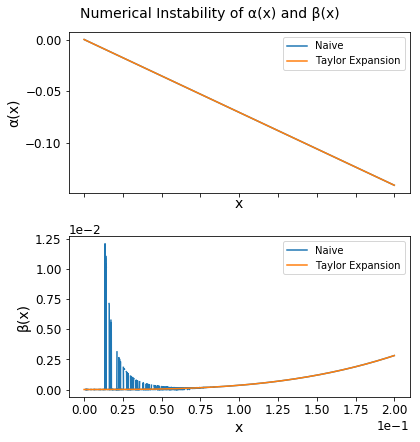

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6), sharex=True, sharey=False)
ax1.plot(x, a_naive(x), label='Naive')
ax1.plot(x, a_taylor(x), label='Taylor Expansion')
ax1.set_xlabel('x')
ax1.set_ylabel('α(x)')
ax1.legend()
ax2.plot(x, b_naive(x), label='Naive')
ax2.plot(x, b_taylor(x), label='Taylor Expansion')
ax2.set_xlabel('x')
ax2.set_ylabel('β(x)')
ax2.legend()
ax2.ticklabel_format(style='scientific', scilimits=(0, 1e-3))
plt.suptitle('Numerical Instability of α(x) and β(x)', y=1.02)
fig.tight_layout()
plt.show()
fig.savefig(plot_dir + 'alpha_beta_naive_and_taylor.png', bbox_inches='tight')

### Considering the absolute difference

/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


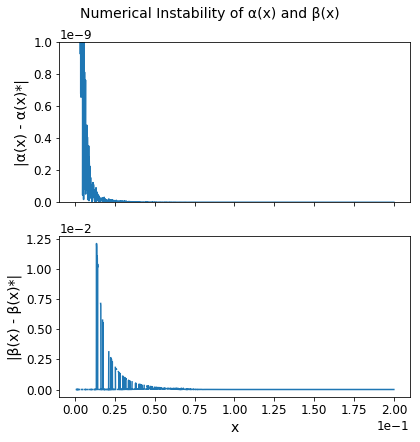

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6), sharex=True, sharey=False)
ax1.plot(x, abs(a_taylor(x) - a_naive(x)))
ax1.set_ylim(0, 1e-9)
ax1.set_ylabel('|α(x) - α(x)*|')
ax2.plot(x, abs(b_taylor(x) - b_naive(x)))
ax2.ticklabel_format(style='scientific', scilimits=(0, 1e-3))
ax2.set_xlabel('x')
ax2.set_ylabel('|β(x) - β(x)*|')
plt.suptitle('Numerical Instability of α(x) and β(x)', y=1.02)
fig.tight_layout()
plt.show()
fig.savefig(plot_dir + 'alpha_beta_difference.png', bbox_inches='tight')